# Deconvelution

lets see what we get

In [1]:
!pip install pandas


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Youness Azimzade\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd


ModuleNotFoundError: No module named 'pandas'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
data2 = pd.read_csv("D:/Dropbox (UiO)/Validation2/Metabric/Data.csv")

: 

In [2]:
data= data2 
#data.to_csv('D:/Dropbox (UiO)/Validation/0Code/METABRIC/LumA/AllData.csv') 
data= pd.DataFrame(data.drop(['Tumor.Stage' ,'PAM50CL' , 'Nottingham.prog.ind'], axis=1))  
# data=data.drop(data.loc[:, 'B.cells.Memory':'T.cells.CD8.'].columns, axis=1)
data=data.dropna(axis=0)
data.shape

(1764, 48)

In [3]:
her2={'Positive':1,'Negative':0}
data.HER2 = [her2[item] for item in data.HER2]

cellul={'Low':1,'Moderate':2, 'High':3}
data.Cellularity = [cellul[item] for item in data.Cellularity]

pgr = {'Positive': 1,'Negative': 0}
data.PgR = [pgr[item] for item in data.PgR]

er = {'Positive': 1,'Negative': 0}
data.ER = [er[item] for item in data.ER]

categorical_cols = ['PAM50']  
data = pd.get_dummies(data, columns = categorical_cols) 

In [4]:
data.shape

(1764, 52)

# Preprocessing 

In [5]:
import seaborn as sns
from sklearn import set_config
from sklearn.model_selection import ShuffleSplit, GridSearchCV

from sksurv.metrics import concordance_index_censored
from sksurv.svm import FastSurvivalSVM

In [6]:
set_config(display="text")  # displays text representation of estimators
sns.set_style("whitegrid")

In [7]:
X= pd.DataFrame(data.drop(['Mixture','RFSurvival','RFStatus'],axis=1))  
d3=pd.DataFrame(data.drop(['Mixture','RFSurvival','RFStatus'],axis=1))  
y=  data[['RFStatus','RFSurvival']]

In [8]:
from sklearn import preprocessing
X = pd.DataFrame(preprocessing.StandardScaler().fit(X).transform(X), columns =d3.columns)
X.shape
X.head()

,B.cells.Memory,B.cells.Naive,CAFs.MSC.iCAF.like,CAFs.myCAF.like,DCs,Endothelial.ACKR1,Endothelial.CXCL12,Endothelial.LYVE1,Endothelial.RGS5,GenMod1,...,Neopl.Histo.Grade,HER2,PgR,Tumor.Size,Lym.nodes.positive,PAM50_Basal,PAM50_Her2,PAM50_LumA,PAM50_LumB,PAM50_Normal
0,-0.240249,-0.516887,-0.409623,0.606237,-0.279513,1.078028,-0.511583,0.417053,-0.855290,0.201101,...,-0.655293,-0.375512,0.953463,-0.548884,-0.252540,-0.461741,-0.400657,-0.715240,1.668954,-0.301511
1,-0.240249,-0.326461,-0.443483,-0.989886,-0.279513,-0.567284,-0.622712,0.051459,0.312454,-0.103742,...,0.892145,2.663033,-1.048809,-0.678931,0.711704,-0.461741,2.495898,-0.715240,-0.599178,-0.301511
2,-0.240249,0.388537,0.983750,0.406695,-0.279513,-0.399258,-0.622712,0.544000,1.864571,0.881041,...,0.892145,-0.375512,0.953463,-0.743955,1.434887,-0.461741,-0.400657,-0.715240,1.668954,-0.301511
3,-0.240249,-0.389463,-0.440916,0.262595,-0.279513,-0.542771,-0.622712,-0.324862,-0.374897,-0.980525,...,0.892145,-0.375512,0.953463,-0.353813,-0.252540,-0.461741,-0.400657,-0.715240,1.668954,-0.301511
4,-0.240249,-0.229412,0.705109,0.057752,-0.279513,0.338184,0.008489,0.032664,-0.721298,0.721458,...,-0.655293,-0.375512,0.953463,-0.223766,-0.493601,-0.461741,-0.400657,1.398132,-0.599178,-0.301511


In [9]:
X.shape
y.shape

(1764, 2)

In [10]:
n_censored = y.shape[0] - y["RFStatus"].sum()
print("%.1f%% of records are censored" % (n_censored / y.shape[0] * 100))

59.2% of records are censored


In [11]:
def score_survival_model(model, X, y):
    prediction = model.predict(X)
    result = concordance_index_censored(y['RFStatus'], y['RFSurvival'], prediction)
    return result[0]

In [12]:
y=y.to_numpy()

#List of tuples
aux = [(e1,e2) for e1,e2 in y]

#Structured array
ny = np.array(aux, dtype=[('RFStatus', '?'), ('RFSurvival', '<f8')])
#new_data_y 

In [13]:
#Import necessary ML packages
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

X_train,X_test,y_train,y_test=train_test_split(X,ny,test_size=0.33333,random_state=10)#

In [14]:
from sklearn.model_selection import train_test_split
from sksurv.datasets import load_breast_cancer
from sksurv.ensemble import ComponentwiseGradientBoostingSurvivalAnalysis
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.preprocessing import OneHotEncoder

In [15]:
est_cph_tree = GradientBoostingSurvivalAnalysis(
    n_estimators=70,learning_rate=0.4018,max_depth=2, random_state=0)
est_cph_tree.fit(X_train, y_train)
cindex = est_cph_tree.score(X_test, y_test)
print(round(cindex,3))

0.658


In [ ]:


from numpy import mean
from numpy import std

scores_cph_tree={}
scores_rsf2={}
est_cph_tree = GradientBoostingSurvivalAnalysis(random_state=0)


for i in range(1, 6):
    n_estimators=30+i*10
    for j in range(-6,0):
        learning_rate= 1.2**(j)
        for k in range(2,4):
            max_depth= k*1
            est_cph_tree.set_params(n_estimators=n_estimators,learning_rate=learning_rate,max_depth=max_depth)
            for it in range(1 , 6):
                iter=it
                X_train,X_test,y_train,y_test=train_test_split(X,ny,test_size=0.3333,random_state=12*iter)
                est_cph_tree.fit(X_train, y_train)
                scores_rsf2[iter]=est_cph_tree.score(X_test, y_test) 
            
            x,y=zip(*scores_rsf2.items())
            x=pd.DataFrame(x,columns=['Iteration'])
            y=pd.DataFrame(y,columns=['CIndex'])
            x=pd.concat([x,y],axis=1) 
            scores_cph_tree[n_estimators,learning_rate,max_depth]=  mean(x.CIndex) , std(x.CIndex)
            
x,y =zip(*scores_cph_tree.items())
x = pd.DataFrame(x, columns =['n_estimators', 'learning_rate', 'max_depth'])
y = pd.DataFrame(y, columns =['CIndex','SD'])
x = pd.concat([x, y], axis=1)

print(x[x.CIndex== x.CIndex.max()])

In [20]:
est_cph_tree.set_params(n_estimators=70,learning_rate=0.334,max_depth=2)
est_cph_tree.fit(X, ny)

cindex = est_cph_tree.score(X, ny)
print(round(cindex,3))

0.766


# SHAP

In [21]:
import shap

c:\Users\Youness\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
svm_explainer = shap.KernelExplainer(est_cph_tree.predict,shap.kmeans(X, 500))   # 
svm_shap_values = svm_explainer.shap_values(X)

X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/1764 [00:00<?, ?it/s]X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] +

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


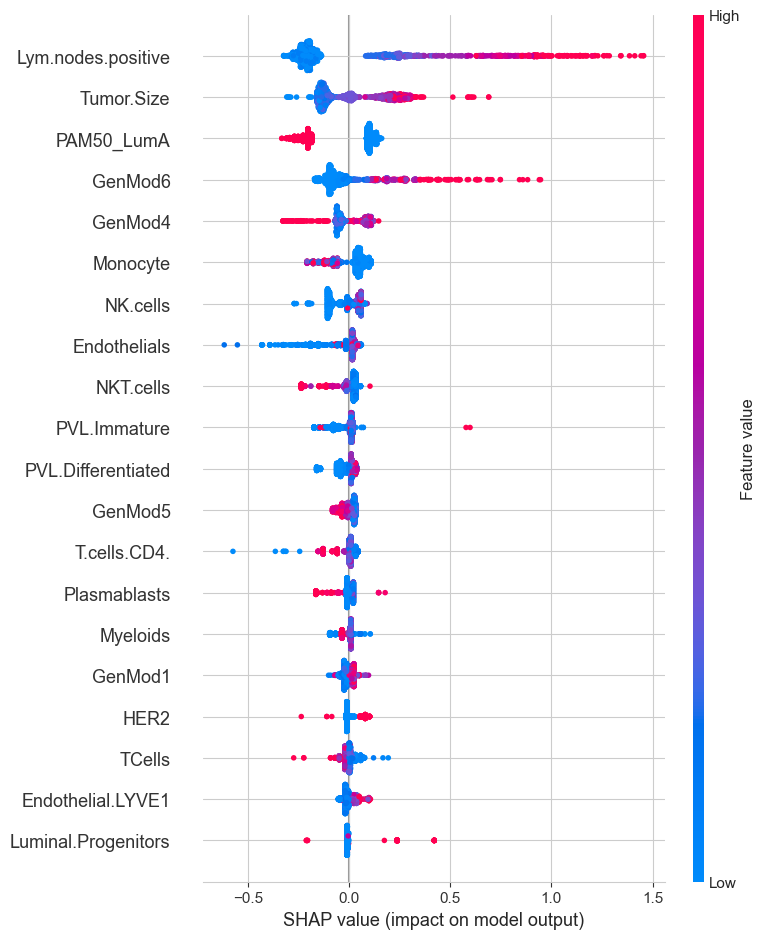

In [23]:
svm_shap= pd.DataFrame(svm_shap_values,columns=X.columns)
# svm_shap.to_csv('E:/Dropbox (UiO)/Validation/0Code/METABRIC/SSVM SHAP.csv') 
svm_shap.to_csv('D:/Dropbox (UiO)/Validation/0Code/METABRIC/SHAP XGB.csv') 

shap.summary_plot(svm_shap_values, X,feature_names=X.columns)

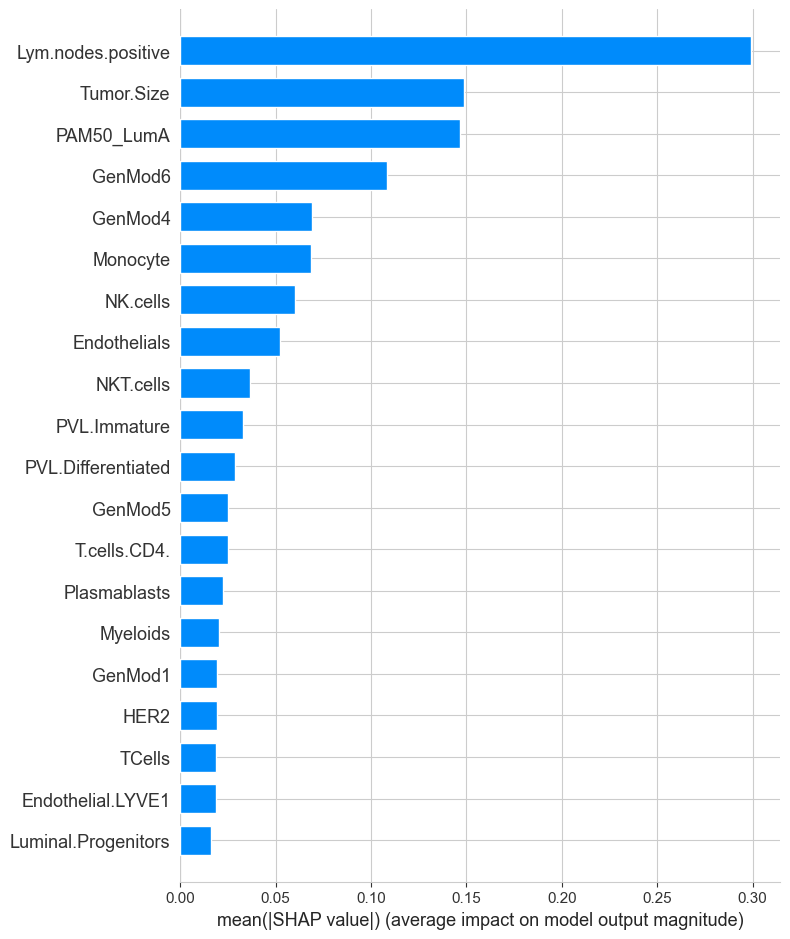

In [24]:
shap.summary_plot(svm_shap_values,X,feature_names=d3.columns,plot_type="bar")